In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# csv has been upload on the repo. It is exported from neighborhood database
df = pd.read_csv('/Users/apple/Desktop/PUI2017/HW8_yl5240/geolytics_nyc_pop_income_house_2010.csv')

In [3]:
df.head()

,AREAKEY,TRCTPOP1,MDFAMY1A,MDVALHS1A
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [4]:
df.columns  = ['census_tract', 'Population', 'Median_family_income', 'Median_house_value']
df.head()

,census_tract,Population,Median_family_income,Median_house_value
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [5]:
df.shape

(2168, 4)

In [6]:
df1 = df[(df.Median_family_income > 0)&(df.Median_house_value>0)].reset_index(drop = True)
df1.shape

(2000, 4)

In [7]:
str(df.iloc[0,0]).startswith('36005')

True

In [33]:
for i in df1.index:
    if str(df1.loc[i,'census_tract']).startswith('36005'):
        df1.loc[i,'Borough'] = 'Bronx'
        df1.loc[i,'color'] = 'b'
    elif str(df1.loc[i,'census_tract']).startswith('36047'):
        df1.loc[i,'Borough'] = 'Brooklyn'
        df1.loc[i,'color'] = 'g'
    elif str(df1.loc[i,'census_tract']).startswith('36061'):
        df1.loc[i,'Borough'] = 'Manhattan'
        df1.loc[i,'color'] = 'r'
    elif str(df1.loc[i,'census_tract']).startswith('36081'):
        df1.loc[i,'Borough'] = 'Queens'
        df1.loc[i,'color'] = 'c'
    elif str(df1.loc[i,'census_tract']).startswith('36085'):
        df1.loc[i,'Borough'] = 'Staten Island'
        df1.loc[i,'color'] = 'm'

In [34]:
df1.head()

,census_tract,Population,Median_family_income,Median_house_value,Borough,color
0,36005000200,4334,58368,392500,Bronx,b
1,36005000400,5503,73148,393700,Bronx,b
2,36005001600,5643,33555,378100,Bronx,b
3,36005002000,8731,30817,398100,Bronx,b
4,36005002500,5491,17048,381300,Bronx,b


In [35]:
df1.describe()

,census_tract,Population,Median_family_income,Median_house_value
count,2.000000e+03,2000.00000,2000.000000,2.000000e+03
mean,3.605564e+10,3886.54500,68005.929500,5.327123e+05
std,2.546893e+07,2100.49912,40111.600298,1.946563e+05
min,3.600500e+10,105.00000,12294.000000,9.999000e+03
25%,3.604703e+10,2374.00000,41983.750000,4.194000e+05
50%,3.604712e+10,3493.00000,58574.000000,5.070000e+05
75%,3.608104e+10,4864.00000,81012.000000,6.329250e+05
max,3.608503e+10,26588.00000,250001.000000,1.000001e+06


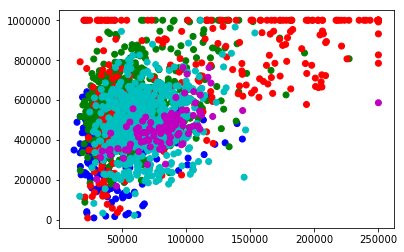

In [36]:
plt.scatter(df1.Median_family_income, df1.Median_house_value, c = df1.color)

In [13]:
df4 = pd.concat([df1.groupby(by = 'Borough').sum()['Population'],
           df1.groupby(by = 'Borough').mean()[['Median_family_income','Median_house_value']]],
          axis = 1).reset_index()
df4

,Borough,Population,Median_family_income,Median_house_value
0,Bronx,1205177,47655.859155,376643.306338
1,Brooklyn,2289161,55506.289474,552790.497076
2,Manhattan,807878,65408.790698,532036.426357
3,Queens,2205621,66671.485804,490727.917981
4,Staten Island,466261,81579.628571,459564.761905


In [17]:
df3 = pd.concat([df1.groupby(by = 'Borough').sum()['Population'],
           df1.groupby(by = 'Borough').median()[['Median_family_income','Median_house_value']]],
          axis = 1).reset_index()
df3

,Borough,Population,Median_family_income,Median_house_value
0,Bronx,1208537,41303.5,413200.0
1,Brooklyn,2412974,51641.0,568300.0
2,Manhattan,1472082,109219.0,752900.0
3,Queens,2213131,64126.0,486450.0
4,Staten Island,466366,84628.0,459200.0


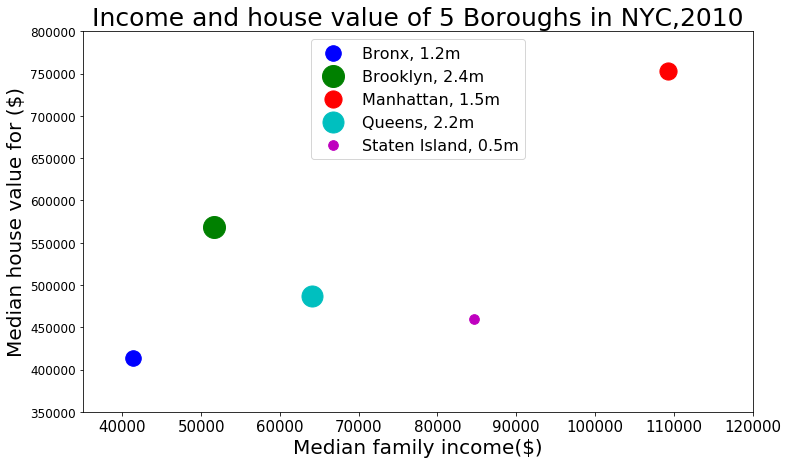

In [47]:
plt.figure(figsize = (12, 7))
plt.scatter(df3.Median_family_income[0], df3.Median_house_value[0], 
            s = df3.Population[0]/5000, label = 'Bronx, 1.2m', c = 'b')
plt.scatter(df3.Median_family_income[1], df3.Median_house_value[1], 
            s = df3.Population[1]/5000, label = 'Brooklyn, 2.4m', c = 'g')
plt.scatter(df3.Median_family_income[2], df3.Median_house_value[2], 
            s = df3.Population[2]/5000,label = 'Manhattan, 1.5m', c ='r')
plt.scatter(df3.Median_family_income[3], df3.Median_house_value[3], 
            s = df3.Population[3]/5000,label = 'Queens, 2.2m', c = 'c')
plt.scatter(df3.Median_family_income[4], df3.Median_house_value[4], 
            s = df3.Population[4]/5000,label = 'Staten Island, 0.5m', c = 'm')
plt.legend(loc= 'upper center', prop={'size': 16})
plt.xlim(35000,120000)
plt.ylim(350000,800000)
plt.xticks(fontsize =15)
plt.yticks(fontsize =12)
plt.xlabel('Median family income($)', fontsize = 20)
plt.ylabel('Median house value for ($)', fontsize = 20)
plt.title('Income and house value of 5 Boroughs in NYC,2010', fontsize = 25)
plt.show()

In [48]:
plt.legend?